# Comparação dos resultados do IDEB de Escolas Municipais localizadas em áreas com diferentes indicadores de segurança pública no Município do Rio de Janeiro - RJ 

Neste trabalho final da disciplina de Seminários de estatística, cursada em 2024.1, apresentamos essa análise, nestes notebooks temos o trabalho completo que está resumido no cartaz apresentado na Escola Nacional de Ciências Estatísticas (https://ence.ibge.gov.br/)

## Motivação 

A responsabilidade pela disponibilização de educação infantil e do ensino fundamental é dos municípios, conforme preconiza a Constituição Federal em seu artigo 211.  

Na cidade do Rio de janeiro, muitas escolas estão situadas em áreas com problemas de segurança pública.  

Em ano de eleições municipais, pareceu-nos importante identificar se há relação da localização das escolas, se próximas ou não a áreas conflagradas, com os resultados obtidos com o IDEB (Índice de Desenvolvimento da Educação Básica). 

## Objetivo 

Identificar se há relação da localização das escolas, se próximas ou não a áreas conflagradas, com os resultados obtidos com o IDEB (Índice de Desenvolvimento da Educação Básica), no município do Rio de Janeiro-RJ. 

## População alvo 

IDEB de escolas localizadas no Município do Rio de Janeiro obtido através da aplicação do SAEB (Sistema de Avaliação da Educação Básica) em 2021. 

### Grupo:
Anna Maria Scofano (202410091-03) <br>
Bernardo Monteiro Rocha (202410221-26) <br> 
Viviane Bastos de Oliveira Moura (202411001-00) <br> 
Fernando Chahine Barros (202410631-59)

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import statistics
import math

Datasets do IDEB de 2021 baixados no link ( https://www.gov.br/inep/pt-br/areas-de-atuacao/pesquisas-estatisticas-e-indicadores/ideb/resultados ) em 14/06/2024, tratados no mesmo dia para o prosseguimento do trabalho.

In [52]:
df_escolas_municipais = pd.read_excel('dados/Escolas_Municipais.xlsx')
df_escolas_municipais.head()

,X,Y,objectid,Designação,nome_escola,endereco,bairro,cre,cod_atividade,telefones,link_cartela,globalid,data_inauguracao,designacao_num,nome_abrev,cod_microarea
0,-43.252938,-22.993559,16229,227004,Escola Municipal Rinaldo De Lamare,"Avenida Niemeyer, 776",Rocinha,2,1,,http://webapp.sme.rio.rj.gov.br/jcartela/publi...,{52C57AB8-972A-4DAF-B3A9-8B8B689C98F0},NaN,227004.0,EM Rinaldo De Lamare,2.10
1,-43.222709,-22.979395,16230,206024,Escola Municipal Sergio Vieira de Mello,"Rua Adalberto Ferreira, 19",Leblon,2,1,2259-9444,http://webapp.sme.rio.rj.gov.br/jcartela/publi...,{0BC0B627-149C-4EF2-ACE3-7C0B3780AC91},NaN,206024.0,EM Sergio Vieira de Mello,2.5
2,-43.181053,-22.934001,16231,204021,Escola Municipal Senador Corrêa,Rua Esteves Junior Nº 42,Laranjeiras,2,1,2558-3159,http://webapp.sme.rio.rj.gov.br/jcartela/publi...,{3ADF744E-9D00-4905-BFB9-9BDF29CAC69D},NaN,204021.0,EM Sen. Corrêa,2.1
3,-43.188093,-22.903783,16232,102004,Escola Municipal Rivadavia Corrêa,"Av. Pres. Vargas, 1.314",Centro,1,1,2253-8064,http://webapp.sme.rio.rj.gov.br/jcartela/publi...,{1410326F-9585-42C0-BCD6-DA28D3601A10},NaN,102004.0,EM Rivadavia Corrêa,1.6
4,-43.233936,-22.892220,16233,107501,Escola Municipal Edmundo Bittencourt,"Rua Lopes Trovão, 287",Benfica,1,1,3860-5150,http://webapp.sme.rio.rj.gov.br/jcartela/publi...,{EF28E061-20D6-4CBC-AC2C-E920E4E305EE},NaN,107501.0,EM Edmundo Bittencourt,1.2


In [53]:
df_RJ_IDEB_anos_finais_escolas_municipais = pd.read_excel('dados/RJ_IDEB_anos_finais_escolas_2021.xlsx')
df_RJ_IDEB_anos_finais_escolas_municipais.head()

,Código da Escola,Designação,Nome da Escola,Média - 6º a 9º ano,Taxa de Aprovação - 2021 - 6º,Taxa de Aprovação - 2021 - 7º,Taxa de Aprovação - 2021 - 8º,Taxa de Aprovação - 2021 - 9º,Indicador de Rendimento (P),Nota SAEB - 2021 - Matemática,Nota SAEB - 2021 - Língua Portuguesa,Nota SAEB - 2021 - Nota Média Padronizada (N),IDEB 2021 (N x P)
0,33062420,101004,ESCOLA MUNICIPAL BENJAMIM CONSTANT,99.7,100,100,98.9,100,0.997227,249.35,246.05,4.923333,4.9
1,33062439,101003,ESCOLA MUNICIPAL DARCY VARGAS,-,-,-,-,-,-,-,-,-,-
2,33062471,101007,ESCOLA MUNICIPAL MARECHAL MASCARENHAS DE MORAE...,97.2,94.4,99.2,95.2,100,0.971391,243.47,248.07,4.859,4.7
3,33062498,101009,ESCOLA MUNICIPAL PROFESSOR WALTER CARLOS DE MA...,100,100,100,100,100,1,245.08,253.6,4.978,5
4,33062501,101001,ESCOLA MUNICIPAL VICENTE LICINIO CARDOSO,97.8,-,98.9,95.2,98.9,0.976351,249.05,254.99,5.067333,4.9


In [54]:
df_RJ_IDEB_anos_iniciais_escolas_2021 = pd.read_excel('dados/RJ_IDEB_anos_iniciais_escolas_2021.xlsx')
df_RJ_IDEB_anos_iniciais_escolas_2021.head()

,Código da Escola,Designação,Nome da Escola,Taxa de Aprovação - 2021 - 1º ao 5º ano,Taxa de Aprovação - 2021 - 1º,Taxa de Aprovação - 2021 - 2º,Taxa de Aprovação - 2021 - 3º,Taxa de Aprovação - 2021 - 4º,Taxa de Aprovação - 2021 - 5º,Indicador de Rendimento (P),Nota SAEB - 2021 - Matemática,Nota SAEB - 2021 - Língua Portuguesa,Nota Média Padronizada (N),IDEB 2021 (N x P)
0,33062358,101501,CIEP HENFIL,100,100,100,100,100,100,1,188.42,175.26,4.7464,4.7
1,33062420,101004,ESCOLA MUNICIPAL BENJAMIM CONSTANT,98.6,98.3,96.6,100,100,100,0.989611,ND,ND,-,-
2,33062439,101003,ESCOLA MUNICIPAL DARCY VARGAS,98.5,97.8,98.2,98.3,100,98.6,0.985743,ND,ND,-,-
3,33062447,101006,ESCOLA MUNICIPAL FRANCISCO BENJAMIM GALLOTI,100,100,100,100,100,100,1,201.56,187.99,5.228618,5.2
4,33062455,101005,ESCOLA MUNICIPAL GENERAL MITRE,99.7,98.3,100,100,100,100,0.996553,199.85,184.37,5.130166,5.1


### Agora iremos juntar os 3 datasets em um a partir da variável [ Designação ] 

In [50]:
merged_df = pd.merge(df_escolas_municipais, df_RJ_IDEB_anos_finais_escolas_municipais, on='Designação', how='inner')

# Em seguida, mesclamos o resultado com df3
#final_df = pd.merge(merged_df, df3, on='key', how='outer')

merged_df.head()

KeyError: 'Designação'

In [39]:
df = pd.merge(merged_df, df_RJ_IDEB_anos_iniciais_escolas_2021, on='Designação', how='outer')
df.head()

,objectid,Designação,nome_escola,endereco,bairro,cre,cod_atividade,globalid,cod_microarea,Nome da Escola_x,...,Taxa de Aprovação - 2021 - 1º,Taxa de Aprovação - 2021 - 2º,Taxa de Aprovação - 2021 - 3º,Taxa de Aprovação - 2021 - 4º,Taxa de Aprovação - 2021 - 5º,Indicador de Rendimento (P)_y,Nota SAEB - 2021 - Matemática_y,Nota SAEB - 2021 - Língua Portuguesa_y,Nota Média Padronizada (N),IDEB 2021 (N x P)_y
0,16232.0,102004,Escola Municipal Rivadavia Corrêa,"Av. Pres. Vargas, 1.314",Centro,1.0,1.0,{1410326F-9585-42C0-BCD6-DA28D3601A10},1.6,ESCOLA MUNICIPAL RIVADAVIA CORREA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,16234.0,101009,Escola Municipal Professor Walter Carlos de Ma...,"Rua Carlos Seidl, 1.141",Caju,1.0,1.0,{8FDEA104-7B9B-4147-9E17-835A4166D22F},1.1,ESCOLA MUNICIPAL PROFESSOR WALTER CARLOS DE MA...,...,-,-,-,-,-,-,-,-,-,-
2,16236.0,208002,Escola Municipal Reverendo Martin Luther King,"Rua Joaquim Palhares, 648",Praça da Bandeira,2.0,1.0,{5DC4E294-2384-4D5C-ABDE-4D32DF1D83EF},2.15,ESCOLA MUNICIPAL REVERENDO MARTIN LUTHER KING,...,100,100,100,100,100,1,207.76,191.22,5.405666,5.4
3,16238.0,209013,Escola Municipal Francisco Manuel,"Rua Senador Soares, 61",Vila Isabel,2.0,1.0,{A07AEC42-BF0C-4154-8628-89940359C7A1},2.15,ESCOLA MUNICIPAL FRANCISCO MANUEL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,16239.0,209021,Escola Municipal Presidente João Goulart,"Rua Barão de Mesquita, 850",Andarai,2.0,1.0,{16EFC3FB-E448-4783-93C1-357B0F8D39F3},2.16,ESCOLA MUNICIPAL PRESIDENTE JOAO GOULART,...,95.8,98,96.7,96.1,95.1,0.963301,181.11,176.28,4.625441,4.5


In [48]:
df = df.reset_index(drop=True, inplace=True)


AttributeError: 'NoneType' object has no attribute 'reset_index'

In [47]:
df.head()

AttributeError: 'NoneType' object has no attribute 'head'

                                              geometry
0    POLYGON ((-42.18687 -22.55548, -42.18733 -22.5...
1    MULTIPOLYGON (((-41.90082 -22.78264, -41.90079...
2    POLYGON ((-42.52555 -22.16087, -42.50060 -22.1...
3    POLYGON ((-43.34665 -22.00375, -43.34603 -22.0...
4    MULTIPOLYGON (((-41.97224 -22.14280, -41.97201...
..                                                 ...
132  MULTIPOLYGON (((-43.11375 -22.86460, -43.11358...
133  MULTIPOLYGON (((-42.98891 -22.89112, -42.98870...
134  POLYGON ((-43.16851 -22.91435, -43.16854 -22.9...
135  MULTIPOLYGON (((-43.17829 -22.89257, -43.17950...
136  MULTIPOLYGON (((-43.17170 -22.77666, -43.17170...

[137 rows x 1 columns]


<Axes: >

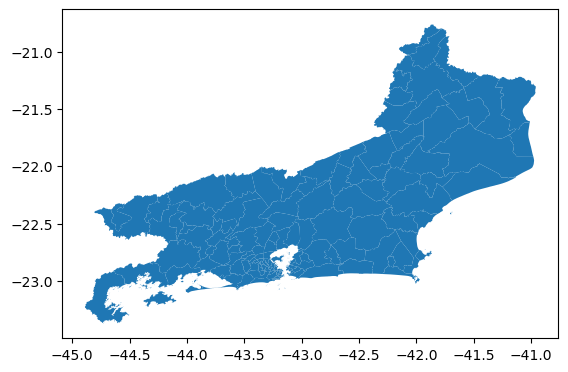

In [6]:
import geopandas as gpd, fiona
fiona.drvsupport.supported_drivers['kml'] = 'rw'

shapefile = gpd.read_file("dados/lm_dp_2019.shx")
print(shapefile);
shapefile.plot()

In [7]:
from shapely.geometry import Point, Polygon
fiona.drvsupport.supported_drivers['KML'] = 'rw'

In [8]:
my_map = gpd.read_file('dados/doc.kml', driver='KML');
my_map

,Name,Description,geometry
0,120,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...","MULTIPOLYGON Z (((-42.18687 -22.55548 0.00000,..."
1,127,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...","MULTIPOLYGON Z (((-41.90082 -22.78264 0.00000,..."
2,151,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...","MULTIPOLYGON Z (((-42.52555 -22.16087 0.00000,..."
3,107,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...","MULTIPOLYGON Z (((-43.34665 -22.00375 0.00000,..."
4,123,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...","MULTIPOLYGON Z (((-41.97224 -22.14280 0.00000,..."
...,...,...,...
132,76,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...","MULTIPOLYGON Z (((-43.11375 -22.86460 0.00000,..."
133,81,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...","MULTIPOLYGON Z (((-42.98891 -22.89112 0.00000,..."
134,9,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...","MULTIPOLYGON Z (((-43.16851 -22.91435 0.00000,..."
135,1,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...","MULTIPOLYGON Z (((-43.17829 -22.89257 0.00000,..."


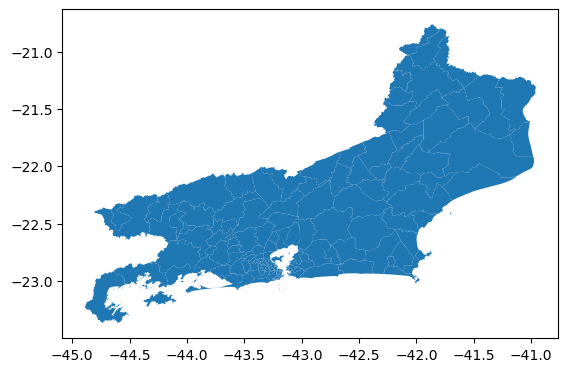

In [11]:
gdf = gpd.read_file('dados/mapa_cisp.json')
gdf.plot()
plt.show()